In [1]:
import pandas as pd
import json
import numpy as np
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from scipy.spatial import distance
selected_month="March"
selected_topic=0

In [2]:
df=pd.read_csv("./data/"+selected_month+".csv")
df_by_topic=df[df['topic_number']==selected_topic].reset_index()
f = open("./data/keywords/"+selected_month+'.json')    
keywords_data = json.load(f)
keywords=[i[0] for i in keywords_data[str(selected_topic)]]

In [38]:
df_by_topic['subjective_prob_scaled']=df_by_topic['subjective_prob'].apply(lambda x:2*x-1)
df_by_topic["SentimentScore_scaled"]=df_by_topic["SentimentScore"]/df_by_topic["SentimentScore"].abs().max()

In [39]:
def map_func(cleaned_tweet,subjective_prob_scaled,SentimentScore_scaled,keywords,alpha):
    sentence_vector=[]
    for word in keywords:
        if(word in cleaned_tweet.split(" ")):
            sentence_vector.append(1)
        else:
            sentence_vector.append(0)
    temp_vector1=np.append(sentence_vector,subjective_prob_scaled*alpha)
    temp_vector2=np.append(temp_vector1,SentimentScore_scaled*alpha)
    return temp_vector2
df_by_topic["embedding"]=df_by_topic.apply(lambda x:map_func(x.cleaned_tweet,x.subjective_prob_scaled,x.SentimentScore_scaled,keywords,0.1),axis=1)

In [40]:
X=[]
for item in df_by_topic["embedding"]:
    X.append(item)

In [18]:
centers = kmeans_plusplus_initializer(X, 8, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize() 
def distanceFunc(point1, point2):
    return distance.cosine(point1[:10],point2[:10])+distance.euclidean(point1[10:12],point2[10:12])
metric = distance_metric(type_metric.USER_DEFINED, func=distanceFunc)
kmeans_instance = kmeans(X, centers, metric=metric)
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/spatial/distance.py:630: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [33]:
for index, cluster in enumerate(clusters):
        for instance in cluster:
            df_by_topic.loc[df_by_topic.index[instance], 'cluster_id'] = "cluster "+str(index)

# TEST Clustering

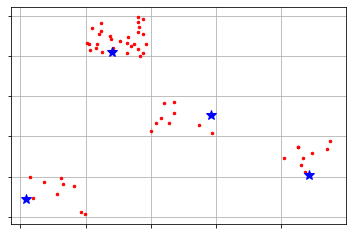

In [8]:
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
 
# Read data 'SampleSimple3' from Simple Sample collection.
sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
 
# Calculate initial centers using K-Means++ method.
centers = kmeans_plusplus_initializer(sample, 4, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
 
# Display initial centers.
visualizer = cluster_visualizer()
visualizer.append_cluster(sample)
visualizer.append_cluster(centers, marker='*', markersize=10)
visualizer.show()
 
# Perform cluster analysis using K-Means algorithm with initial centers.
kmeans_instance = kmeans(sample, centers)
 
# Run clustering process and obtain result.
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()

In [ ]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
 
# Read data 'SampleSimple3' from Simple Sample collection.
sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
def distanceFunc(point1, point2):
    print(point1, point2)
    return point1[0] + point2[0] + 2
metric = distance_metric(type_metric.USER_DEFINED, func=distanceFunc)

# create K-Means algorithm with specific distance metric
start_centers = [[4.7, 5.9], [5.7, 6.5]];
kmeans_instance = kmeans(sample, start_centers, metric=metric)

# run cluster analysis and obtain results
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()

In [13]:
len(sample)

60